# Peoblem Statement
Implement a KNN model to classify the animals in to categorie

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

## 2. Import Dataset

In [2]:
zoo_data = pd.read_csv('Zoo.csv')
zoo_data 

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## 3. EDA
### 3.1Initial Analysis

In [3]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [4]:
zoo_data.shape

(101, 18)

In [5]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
zoo_data['animal name'].duplicated().sum()

1

In [10]:
a = pd.DataFrame(zoo_data['animal name'].duplicated())
a[a['animal name']==True]

,animal name
26,True


In [11]:
zoo_data.rename(columns={'animal name':'animal_name'},inplace=True)
zoo_data.drop_duplicates("animal_name", "first",True)
zoo_data.shape

(100, 18)

In [13]:
zoo_data.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [14]:
zoo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,100.0,0.43,0.497570,0.0,0.00,0.0,1.0,1.0
feathers,100.0,0.20,0.402015,0.0,0.00,0.0,0.0,1.0
eggs,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0
milk,100.0,0.41,0.494311,0.0,0.00,0.0,1.0,1.0
airborne,100.0,0.24,0.429235,0.0,0.00,0.0,0.0,1.0
aquatic,100.0,0.35,0.479372,0.0,0.00,0.0,1.0,1.0
predator,100.0,0.55,0.500000,0.0,0.00,1.0,1.0,1.0
toothed,100.0,0.60,0.492366,0.0,0.00,1.0,1.0,1.0
backbone,100.0,0.82,0.386123,0.0,1.00,1.0,1.0,1.0
breathes,100.0,0.79,0.409360,0.0,1.00,1.0,1.0,1.0


In [15]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    int64 
 2   feathers     100 non-null    int64 
 3   eggs         100 non-null    int64 
 4   milk         100 non-null    int64 
 5   airborne     100 non-null    int64 
 6   aquatic      100 non-null    int64 
 7   predator     100 non-null    int64 
 8   toothed      100 non-null    int64 
 9   backbone     100 non-null    int64 
 10  breathes     100 non-null    int64 
 11  venomous     100 non-null    int64 
 12  fins         100 non-null    int64 
 13  legs         100 non-null    int64 
 14  tail         100 non-null    int64 
 15  domestic     100 non-null    int64 
 16  catsize      100 non-null    int64 
 17  type         100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.8+ KB


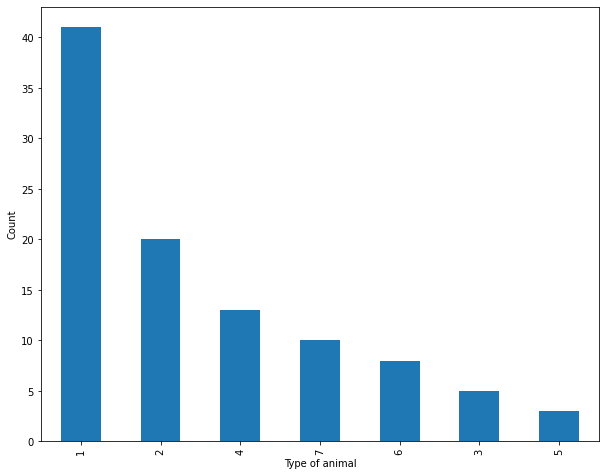

In [16]:
# Type wise animal counts.
plt.figure(figsize=(10,8));
zoo_data.type.value_counts().plot(kind="bar");
plt.xlabel('Type of animal');
plt.ylabel("Count");
plt.plot();    

###### We can see, more number of animals belong to the type 1

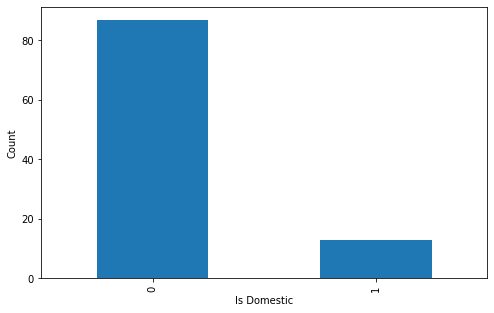

In [17]:
# plot to get number of domestic animals.
plt.figure(figsize=(8,5));
zoo_data.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

###### Most of the animals are not domestic.

In [18]:
# to get domestic animals count in various types of animals - how domestic animals are distributed in various types of animals #frequency table
pd.crosstab(zoo_data.type,zoo_data.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,3,0
6,7,1
7,10,0


###### overall there are just 13 domestic animals among 100 animals

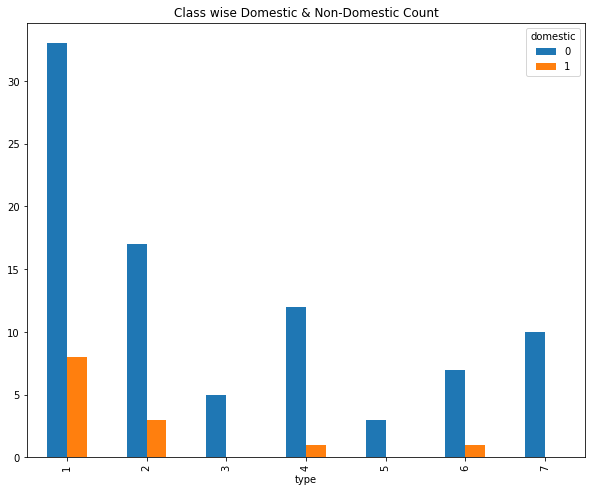

In [19]:
# visualization of above frequency table
pd.crosstab(zoo_data.type, zoo_data.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");

In [20]:
# Most of the domestic animals belong to type 1

#### Animals that provide MILK

In [39]:
# Lets see how many animals provides us milk
print(zoo_data[zoo_data['milk']==1].value_counts().sum(), 'animals provides us milk.')
#zoo_data[(zoo_data.milk==1)].shape[0]
print('The frequency table of milk giving animals in various types of animals:',pd.crosstab(zoo_data.type,zoo_data.milk),sep='\n')

41 animals provides us milk.
The frequency table of milk giving animals in various types of animals:
milk   0   1
type        
1      0  41
2     20   0
3      5   0
4     13   0
5      3   0
6      8   0
7     10   0


###### only type 1 animals provides milk.

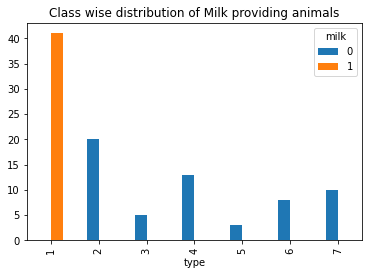

In [27]:
pd.crosstab(zoo_data.type,zoo_data.milk).plot(kind='bar',title='Class wise distribution of Milk providing animals').plot(figsize = (10,8))
plt.show()

#### Understanding Aquatic animals count

In [35]:
zoo_data[(zoo_data.aquatic==1)].shape[0]

35

In [36]:
zoo_data[zoo_data.aquatic==1].type.value_counts().sort_index()

1     6
2     6
3     1
4    13
5     3
7     6
Name: type, dtype: int64

###### Most of the   aquatic animals belong to type 4.

In [40]:
pd.crosstab(zoo_data.type, zoo_data.aquatic)

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,3
6,8,0
7,4,6


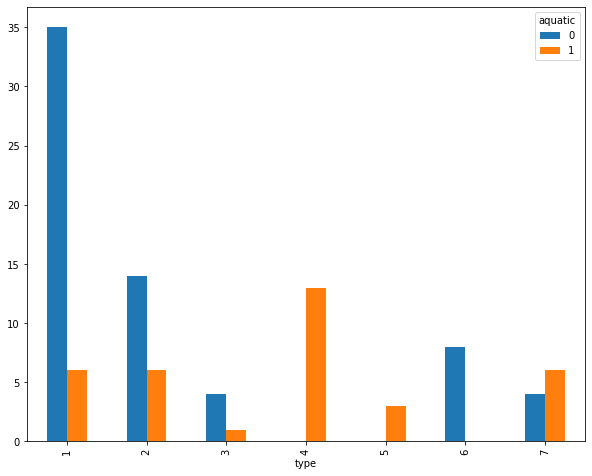

In [38]:
pd.crosstab(zoo_data.type, zoo_data.aquatic).plot(kind="bar", figsize=(10, 8));

#### Understanding venomous(poisonous) animals count

In [43]:
print(zoo_data[zoo_data['venomous']==1].value_counts().sum(), 'animals are venomous.')

print('The frequency table of milk giving animals in various types of animals:')
pd.crosstab(zoo_data.type,zoo_data.venomous)

7 animals are venomous.
The frequency table of milk giving animals in various types of animals:


venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,0
6,6,2
7,8,2


<AxesSubplot:xlabel='type'>

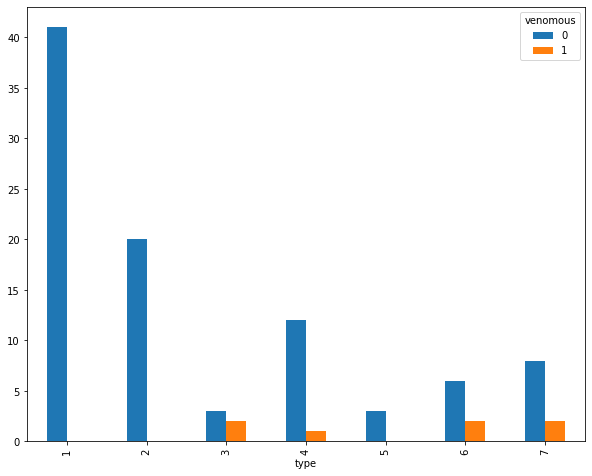

In [44]:
# As per our data we have 2 repltiles which are venomous and , 1 fish and other class types
pd.crosstab(zoo_data.type, zoo_data.venomous).plot(kind="bar", figsize=(10, 8))

#### Understanding about legs of various animals count

In [46]:
print(zoo_data[zoo_data['legs']!=0].value_counts().sum(), 'animals have legs.')

print('The frequency table of milk giving animals in various types of animals:')
pd.crosstab(zoo_data.type,zoo_data.legs)

77 animals are venomous.
The frequency table of milk giving animals in various types of animals:


legs,0,2,4,5,6,8
type,,,,,,
1,3,7,31,0,0,0
2,0,20,0,0,0,0
3,3,0,2,0,0,0
4,13,0,0,0,0,0
5,0,0,3,0,0,0
6,0,0,0,0,8,0
7,4,0,1,1,2,2


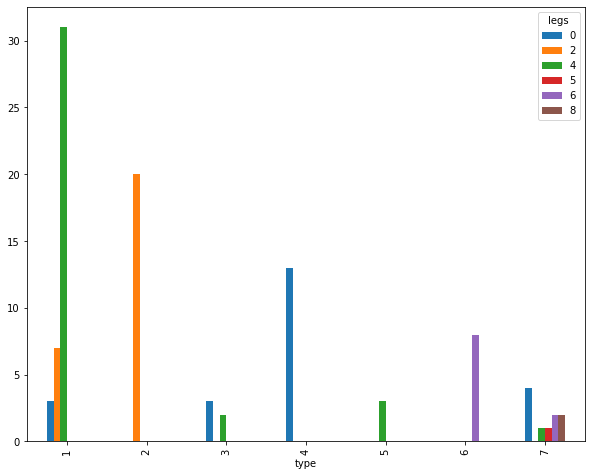

In [47]:
pd.crosstab(zoo_data.type, zoo_data.legs).plot(kind="bar", figsize=(10, 8));

###### Animals belonging to type 4 do not have legs at all.

In [48]:
zoo_data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.434277,-0.816046,0.877637,-2.043147e-01,-0.467951,-0.148195,0.503017,0.196633,0.447809,-0.079958,-0.285535,0.401083,3.498557e-02,0.204810,0.450866,-0.558531
feathers,-0.434277,1.000000,0.425481,-0.416808,6.556101e-01,-0.052414,-0.100504,-0.612372,0.234261,0.257790,-0.137176,-0.226285,-0.204429,2.886751e-01,0.029735,-0.141019,-0.193651
eggs,-0.816046,0.425481,1.000000,-0.938420,3.833190e-01,0.369564,0.004073,-0.653451,-0.345957,-0.388996,0.074645,0.169366,-0.230950,-2.105587e-01,-0.153025,-0.511029,0.658967
milk,0.877637,-0.416808,-0.938420,1.000000,-3.732379e-01,-0.355941,-0.022478,0.639142,0.390567,0.429796,-0.228704,-0.160759,0.220042,1.995586e-01,0.161422,0.571804,-0.721456
airborne,-0.204315,0.655610,0.383319,-0.373238,1.000000e+00,-0.166907,-0.291804,-0.592657,-0.102389,0.289731,0.029366,-0.254322,0.047059,4.352464e-17,0.061269,-0.356606,0.028661
aquatic,-0.467951,-0.052414,0.369564,-0.355941,-1.669075e-01,1.000000,0.368748,0.042796,0.016371,-0.651143,0.045194,0.616748,-0.372313,-1.210455e-02,-0.221313,-0.101368,0.317284
predator,-0.148195,-0.100504,0.004073,-0.022478,-2.918043e-01,0.368748,1.000000,0.123091,0.047088,-0.268959,0.090598,0.195318,-0.105452,3.481553e-02,-0.307814,0.153878,0.052381
toothed,0.503017,-0.612372,-0.653451,0.639142,-5.926573e-01,0.042796,0.123091,1.000000,0.573819,-0.070162,-0.096003,0.369522,-0.199092,3.299832e-01,0.072836,0.353649,-0.484107
backbone,0.196633,0.234261,-0.345957,0.390567,-1.023891e-01,0.016371,0.047088,0.573819,1.000000,0.205774,-0.279523,0.212039,-0.436712,7.513914e-01,0.103712,0.362863,-0.839095
breathes,0.447809,0.257790,-0.388996,0.429796,2.897310e-01,-0.651143,-0.268959,-0.070162,0.205774,1.000000,-0.147224,-0.616347,0.368021,9.922343e-02,0.126297,0.209712,-0.528151


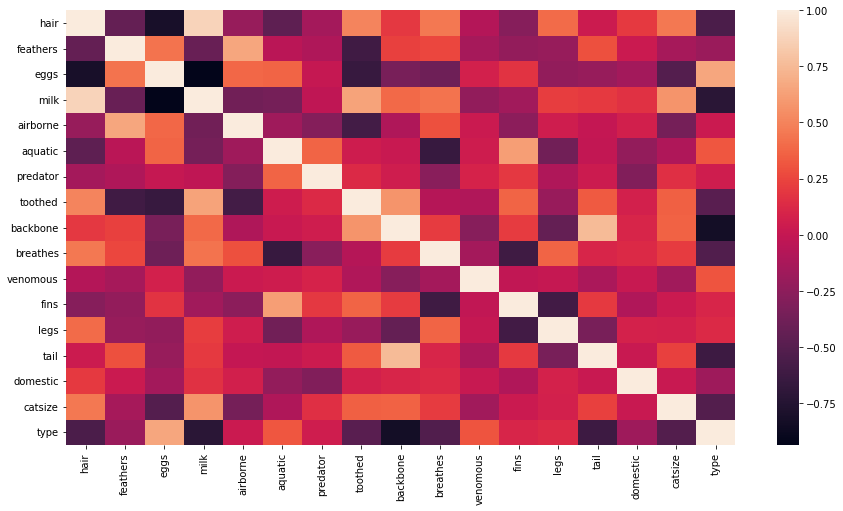

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(zoo_data.corr())
plt.show()

## 5. Model Training || 6. Model Testing || 7. Model Evaluation

In [60]:
X = zoo_data.iloc[:,1:17]
y = zoo_data[['type']]
X.shape, y.shape

((100, 16), (100, 1))

##### Appling StandardScaler

In [61]:
std_Scaler = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=std_Scaler,columns=X.columns)
X_scaled.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,-1.732051,-0.386556,1.128152
1,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,-1.105542,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,0.577350,-0.386556,1.128152
2,-0.868554,-0.5,0.850963,-0.833616,-0.561951,1.362770,0.904534,0.816497,0.468521,-1.939563,-0.274352,2.209605,-1.394055,0.577350,-0.386556,-0.886405
3,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,-1.732051,-0.386556,1.128152
4,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,0.577350,-0.386556,1.128152


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=12,shuffle=True)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80, 1), (20, 16), (20, 1))

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.95.


In [64]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.95.


In [65]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.85.


In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.85.


In [67]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.95.


## Model Evlauation


In [68]:
kfold = KFold(n_splits=5,shuffle=True,random_state=12)
cv_Scores = []

for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator=knn_model,X = X_scaled,y=y,cv=kfold)
    print(i,'th Iteration :\n',cross_val_scores.mean().round(4))
    cv_Scores.append(cross_val_scores.mean().round(4))

1 th Iteration :
 0.94
3 th Iteration :
 0.93
5 th Iteration :
 0.92
7 th Iteration :
 0.85
9 th Iteration :
 0.86
11 th Iteration :
 0.83
13 th Iteration :
 0.83
15 th Iteration :
 0.86
17 th Iteration :
 0.86
19 th Iteration :
 0.84
21 th Iteration :
 0.83
23 th Iteration :
 0.81
25 th Iteration :
 0.8
27 th Iteration :
 0.76
29 th Iteration :
 0.73


In [70]:
print(cv_Scores)
print('Maximum cv score is: ',max(cv_Scores))

[0.94, 0.93, 0.92, 0.85, 0.86, 0.83, 0.83, 0.86, 0.86, 0.84, 0.83, 0.81, 0.8, 0.76, 0.73]
Maximum cv score is:  0.94


Text(0.5, 1.0, 'Neighbours vs CV scores')

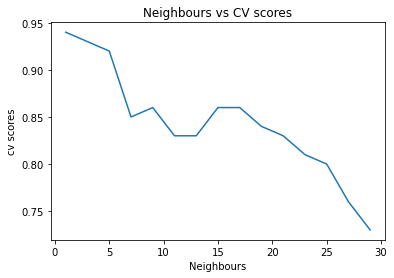

In [73]:
plt.plot(range(1,31,2),cv_Scores)
plt.xlabel('Neighbours')
plt.ylabel('cv scores')
plt.title('Neighbours vs CV scores')

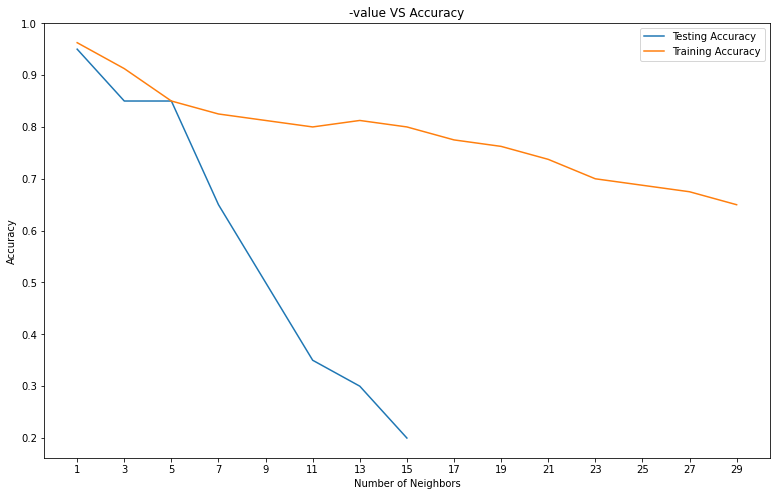

In [74]:
kfold = KFold(n_splits=5,shuffle=True,random_state=12)
cv_Scores_train = []
cv_Scores_test = []

for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator=knn_model,X = X_train,y=y_train,cv=kfold)
    cv_Scores_train.append(cross_val_scores.mean().round(4))
    cross_val_scores = cross_val_score(estimator=knn_model,X = X_test,y=y_test,cv=kfold)
    cv_Scores_test.append(cross_val_scores.mean().round(4))
    
    
plt.figure(figsize=[13,8])
plt.plot(np.arange(1,31,2), cv_Scores_test, label = 'Testing Accuracy')
plt.plot(np.arange(1,31,2), cv_Scores_train, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,31,2))
plt.show()

In [75]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('Accuracy Score is {}.'.format(round(accuracy_score(y_test,y_pred),4)))

Accuracy Score is 0.95.


In [76]:
accuracy_score(y_test,y_pred)

0.95

In [77]:
accuracy_score(y_train,(knn_classifier.fit(X_train,y_train)).predict(X_train))

0.9875

# THE END!!